In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import math 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/traindata.csv')
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
df.shape

(7494, 17)

In [5]:
df.dtypes

input1     int64
input2     int64
input3     int64
input4     int64
input5     int64
input6     int64
input7     int64
input8     int64
input9     int64
input10    int64
input11    int64
input12    int64
input13    int64
input14    int64
input15    int64
input16    int64
class      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   7494 non-null   int64
 1   input2   7494 non-null   int64
 2   input3   7494 non-null   int64
 3   input4   7494 non-null   int64
 4   input5   7494 non-null   int64
 5   input6   7494 non-null   int64
 6   input7   7494 non-null   int64
 7   input8   7494 non-null   int64
 8   input9   7494 non-null   int64
 9   input10  7494 non-null   int64
 10  input11  7494 non-null   int64
 11  input12  7494 non-null   int64
 12  input13  7494 non-null   int64
 13  input14  7494 non-null   int64
 14  input15  7494 non-null   int64
 15  input16  7494 non-null   int64
 16  class    7494 non-null   int64
dtypes: int64(17)
memory usage: 995.4 KB


In [7]:
df.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

In [8]:
from pandas.core import describe
df.describe()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,37.384307,84.679343,40.005604,82.889512,50.878303,65.044436,51.471844,44.599680,57.129971,34.069122,61.417401,35.782092,54.699760,35.800774,46.813718,28.565386,4.430878
std,33.322024,16.848420,26.256025,19.638582,34.927201,27.377341,30.680075,30.659478,33.680340,27.459989,37.130762,27.495836,22.599781,33.223611,41.531794,35.811094,2.876981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.000000,22.000000,30.000000,7.000000,25.000000,12.000000,41.000000,7.000000,0.000000,0.000000,2.000000
50%,31.000000,89.000000,39.000000,89.000000,56.000000,71.000000,54.000000,42.000000,60.000000,33.000000,74.000000,32.000000,53.000000,28.000000,39.000000,8.000000,4.000000
75%,61.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.000000,65.000000,88.000000,55.000000,98.000000,57.000000,69.000000,48.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


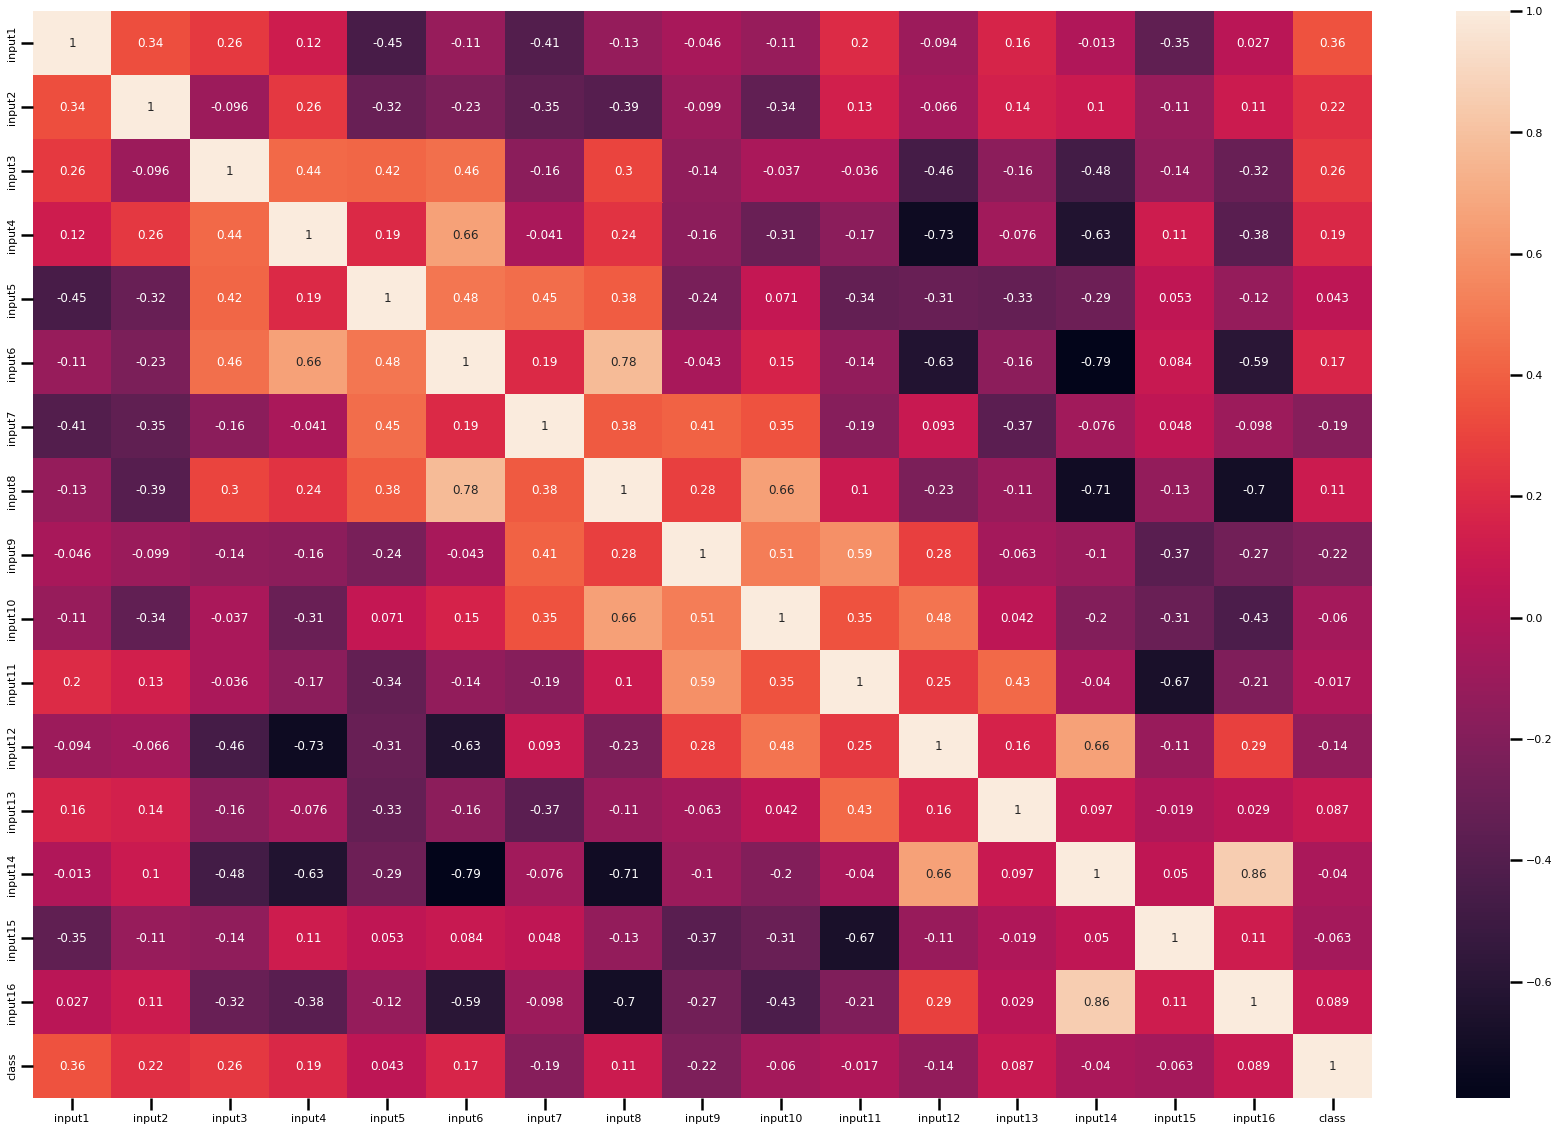

In [9]:
plt.figure(figsize=(30,20))
sn.set_context('poster', font_scale=0.5)
sn.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
y_train=df['class']
df.drop(['class'],axis=1,inplace=True)
x_train=df
x_train.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0


In [12]:
df2 = df.mean(axis=0)
list(df2)

[37.384307445956765,
 84.67934347477983,
 40.00560448358687,
 82.88951160928742,
 50.87830264211369,
 65.04443554843876,
 51.47184414198025,
 44.599679743795036,
 57.12997064318121,
 34.06912196423806,
 61.41740058713638,
 35.7820923405391,
 54.69975980784628,
 35.80077395249533,
 46.81371764077929,
 28.56538564184681]

In [13]:
stds=df.std(axis=0)
list(stds)

[33.322024139408406,
 16.848420488899215,
 26.256025128467858,
 19.63858186630432,
 34.9272012003929,
 27.37734059256016,
 30.68007481096225,
 30.6594782832141,
 33.68034038999615,
 27.459989200946982,
 37.13076213499263,
 27.495835572219057,
 22.599780855074787,
 33.22361050734268,
 41.5317937313256,
 35.8110941884482]

In [14]:
x_train=x_train.apply(lambda iter:((iter-iter.mean())/iter.std()))
x_train.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
0,0.288569,0.909323,-0.495338,-0.096214,0.175270,-1.024367,-0.830241,-1.454678,-1.696241,-0.403100,-0.145901,0.626201,2.004455,1.631347,-0.164060,1.938914
1,-1.121910,0.256443,-0.495338,0.871269,-0.254195,0.363642,-0.732457,0.013057,-1.250877,-0.694433,-0.657606,-1.301364,0.632760,-1.017372,1.280616,-0.630123
2,-1.121910,-1.642845,-0.342992,-0.758177,0.604735,0.911541,1.581748,1.806956,0.560268,1.490564,-0.307492,0.553462,-1.181417,-0.325093,-0.741931,-0.797669
3,-1.121910,0.909323,-1.257068,0.463908,-1.313541,0.107957,-1.058402,0.013057,0.857177,-0.002517,1.039101,0.335247,0.854001,-0.385291,0.486044,-0.797669
4,-1.121910,-1.049318,0.342565,0.005626,1.406402,1.276806,0.962454,1.154629,0.085214,0.944315,-0.576810,0.153402,-0.960176,-0.475589,0.004485,-0.797669


In [15]:
test=pd.read_csv('/content/drive/MyDrive/Dataset/test_data.csv')
test.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [16]:
y_test=test['class']
test.drop(['class'],axis=1,inplace=True)
x_test=test

In [18]:
x_test.iloc[0,0]

88

In [19]:
for j in range(len(df2)):
  for i in range(len(x_test)):
    x_test.iloc[i,j]=(x_test.iloc[i,j]-df2[j])/stds[j]

In [20]:
x_test

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
0,1.518986,0.434501,-1.447500,0.820349,-0.998600,0.034903,1.386182,-0.247874,0.382123,-1.240682,-1.654084,-0.428505,-0.561942,0.878870,1.280616,1.994762
1,1.278905,0.909323,-0.838116,0.769429,0.261163,0.034903,1.581748,-0.508804,-0.449223,-1.240682,-1.654084,-0.464874,-0.561942,0.758473,0.221187,1.938914
2,-1.121910,0.553207,-1.180895,-1.318298,-0.884076,-1.681845,-1.449535,-1.454678,-1.102423,0.070316,0.231145,1.171738,2.004455,1.932337,-0.693775,1.771368
3,1.729057,-0.159026,1.180468,0.871269,-0.683659,0.436696,0.832076,0.926315,1.272850,1.672647,0.850578,0.226140,0.057533,-0.686282,-1.127178,-0.797669
4,0.918782,0.909323,-1.295154,0.260227,-0.111040,0.363642,1.158021,1.219862,0.827487,0.798648,1.039101,-0.246659,0.898249,-0.896976,-1.127178,-0.797669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,-0.041543,0.909323,-0.609597,-0.656336,-1.456696,-0.987840,-0.080568,-0.378339,1.124396,0.470899,0.688987,0.698939,1.827462,-0.445490,1.280616,-0.797669
3494,-0.641747,-0.574496,0.037873,0.871269,0.032115,-0.038150,-0.634674,-0.574037,-1.696241,-1.240682,-1.088515,-0.974042,0.323023,-1.017372,1.280616,-0.406728
3495,0.558660,0.909323,-0.495338,-0.198055,-1.456696,-0.951314,-1.286563,-1.454678,0.263359,-0.694433,1.039101,0.553462,1.694717,1.721644,-0.212216,1.799292
3496,-0.551716,0.909323,-1.523673,-1.114618,-1.370803,-1.535738,-0.113163,-1.454678,1.183778,-0.257434,1.039101,1.098999,0.323023,1.842040,-0.886398,1.464200


In [21]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
y_test=np.array(y_test)

In [22]:
class KNN:
    """class implemitation of the KNN algorithm using euclidean_distance"""

    """
    **Implementation**
    Method:
    - euclidean_distance(r1, r2):
        Returns euclidian distance of values
    - fit(X_train, y_train):
        Fits the KNN model to it's training data
    - predict(X_test):
        Returns y_pred "predictions for X_test data based on fiting model"
    """

    # constractur "use number 5 as adefult to be returned "
    def __init__(self, neighbors=5):
        self.neighbors = neighbors

    # Euclidian Distance
    def euclidean_distance(self, r1, r2):
        """
        Returns euclidian distance of values between elments in r1 and  r2
        Inputs: r1 : int or float
                r2 : int or float
        Output: euclidian_distance : float
        """
        eudist = 0.0 
        for index in range(len(r1)):
            eudist += (r1[index] - r2[index]) ** 2
            euclidian_distance = np.sqrt(eudist)
        
        return euclidian_distance

    # Fit k Nearest Neighbors
    def fit(self, X_train, y_train):
        """
        fitting the model to the training data
        Inputs: X_train : dataframe int or float of inputs feature
                y_train : series of output or target
        Output: N/A pass along to predict
        """
        self.X_train = X_train
        self.y_train = y_train

    # Predict X for kNN
    def predict(self, x_test):
        """
        Returns predictions for X_test based on fitted X_train and y_train data
        Inputs: X :dataframe of int or float of test input feature
        Output: y_pred : list of floats for each vector in X
        """
        y_pred = []
        for index in range(len(x_test)):  
            euclidian_distances = []
            for r in self.X_train:
                # for every row in X_train, find eu_dist to X_test using euclidean_distance() and append to euclidian_distances list
                eu_dist = self.euclidean_distance(r, x_test[index])
                euclidian_distances.append(eu_dist)
            # sort euclidian_distances in ascending order, and retain only k neighbors as specified in neighbors (neighbors=k)
            neighbors = np.array(euclidian_distances).argsort()[: self.neighbors]

            # initialize dictionary to count class occurrences in y_train
            count_neighbors = {}
            for c in neighbors:
              #if you found the k in dict count_neighbors as key add one to it's value else add it to dict count_neighbors and assign 1 to it's value
                if self.y_train[c] in count_neighbors:
                    count_neighbors[self.y_train[c]] += 1
                else:
                    count_neighbors[self.y_train[c]] = 1
           #handiling tie
            maxn = max(count_neighbors, key=count_neighbors.get)
            counter = 0 
            similar = [ ]
            classesorder = [8,2,1,4,6,0,5,9,7,3]
            for c in count_neighbors: 
                if  count_neighbors[c] == maxn:
                    counter+=1
                    similar.append(c)
            if counter > 1 :
                for i in classesorder:
                    if i in similar:
                        y_pred.append(i)
                        break
            else:
                # max count labels to prediction
                y_pred.append(max(count_neighbors, key=count_neighbors.get))

        return y_pred

    

In [23]:
for k in range(1,10):
  clf = KNN(k)
  clf.fit(x_train, y_train)
  predictions = clf.predict(x_test)
  print("number of k is:",k)
  print("prediction is: ",predictions)
  print("actual y is: ", list(y_test))
  count=0
  for i in range(len(predictions)):
    if y_test[i]==predictions[i]:
      count+=1

  print("number of correct preduction instance is: ", count)
  print("number of test instance is: ",len(y_test))
  acc = np.sum(predictions == y_test) / len(y_test)
  print("accuracy is: ",acc)
  print("------------------------------------------------------------------------------------------------")

number of k is: 1
prediction is:  [8, 8, 8, 9, 9, 1, 4, 3, 9, 9, 9, 0, 2, 0, 5, 9, 3, 7, 0, 4, 6, 8, 7, 6, 6, 0, 4, 0, 4, 1, 9, 3, 5, 4, 4, 1, 1, 0, 9, 7, 8, 9, 5, 6, 0, 8, 2, 8, 7, 8, 1, 9, 5, 4, 1, 2, 1, 6, 0, 8, 0, 8, 6, 2, 9, 9, 8, 0, 3, 3, 8, 3, 1, 1, 3, 9, 5, 8, 0, 8, 0, 0, 9, 1, 5, 1, 2, 0, 8, 0, 9, 7, 3, 8, 2, 9, 0, 8, 4, 7, 6, 7, 4, 1, 7, 9, 5, 1, 3, 1, 1, 3, 7, 7, 7, 7, 5, 3, 8, 1, 6, 6, 5, 3, 0, 2, 5, 4, 0, 7, 4, 3, 8, 1, 4, 7, 4, 0, 5, 2, 0, 3, 2, 0, 8, 2, 2, 1, 4, 4, 0, 7, 1, 6, 2, 8, 2, 4, 5, 1, 5, 5, 9, 0, 2, 4, 1, 3, 0, 9, 9, 2, 6, 6, 8, 5, 3, 1, 5, 0, 9, 1, 6, 0, 2, 8, 6, 0, 6, 4, 2, 5, 1, 8, 2, 5, 0, 3, 0, 6, 5, 7, 1, 6, 2, 9, 8, 1, 0, 7, 1, 8, 6, 3, 2, 2, 7, 8, 5, 4, 4, 9, 8, 8, 1, 5, 0, 2, 2, 7, 7, 9, 0, 6, 2, 3, 6, 6, 5, 6, 7, 0, 9, 1, 3, 6, 6, 8, 5, 2, 1, 3, 8, 2, 5, 0, 2, 6, 4, 7, 4, 8, 4, 6, 9, 0, 9, 9, 2, 0, 8, 4, 1, 6, 7, 1, 8, 1, 2, 9, 1, 7, 2, 2, 0, 0, 7, 8, 3, 1, 3, 7, 0, 2, 3, 8, 8, 5, 1, 3, 5, 5, 6, 0, 4, 4, 7, 6, 9, 4, 6, 6, 3, 8, 7, 8, 4, 9, 8, 7, 3, 0,